## K-Nearest Neighbours (KNN)

1. Simple ML algorithm, very intuitive like its name
2. Can be used for both classification and regression
3. Working:
    - Store all data points and labels (Supervised learning)
    - Given a new query point, predict which class it belongs to
    - Find distance of query point from ALL other points
    - Consider nearest k points and consider majority vote of class
4. No training involved, all the work is done at query time
5. 
    - *Training time*: O(1)
    - *Query time*: O(N) or O(NlogN) as we have to sort distances <br>
O(NQ) for Q query points
7. Non-parametric algorithm as no parameters are learnt
8. Used as baseline algorithm for all other algorithms. For a new algorithm, if accuracy is lower than KNN, means algorithm is not good, as KNN is most brute force approach

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
plt.style.use("seaborn")

In [2]:
dfx = pd.read_csv("../Datasets/KNN/xdata.csv")
dfy = pd.read_csv("../Datasets/KNN/ydata.csv")

X = dfx.values
Y = dfy.values

In [3]:
print(X.shape, Y.shape)
dfx.head()
# dfy.head()
# Drop serial number columns

(399, 3) (399, 2)


,0,3.4821055700010444,2.4203917879404533
0,1,3.516279,3.719750
1,2,4.606496,3.414379
2,3,4.677011,3.047244
3,4,4.157725,3.138677
4,5,3.154431,3.619858


In [4]:
X = X[:, 1:]
Y = Y[:, 1:].reshape((-1,))
print(X.shape, Y.shape)

(399, 2) (399,)


In [7]:
# print(X)
# print(Y)

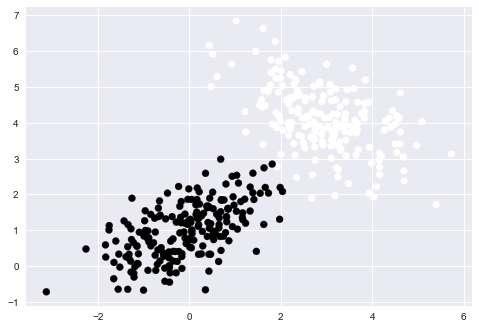

In [11]:
plt.scatter(X[:,0], X[:,1], c=Y)

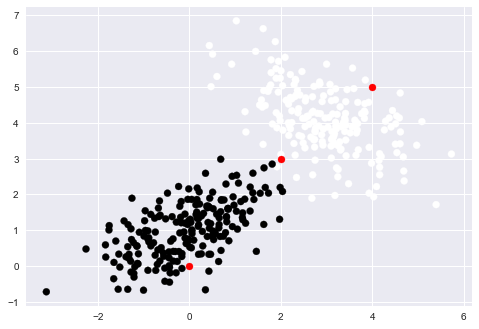

In [45]:
# Generate a query point
query_x = np.array([2,3])
query_x2 = np.array([0,0])
query_x3 = np.array([4,5])
plt.scatter(X[:,0], X[:,1], c=Y)
plt.scatter(query_x[0], query_x[1], color='red')
plt.scatter(query_x2[0], query_x2[1], color='red')
plt.scatter(query_x3[0], query_x3[1], color='red')
# plt.xlim((1.5,2.5))
# plt.ylim((2.5,3.5))
plt.show()

In [36]:
# Distance function used: Euclidean Distance
 
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X, Y, queryPoint, k=5):
    m = X.shape[0]
    distances = []
    
    for i in range(m):
        d = dist(queryPoint, X[i])
        distances.append((d, Y[i]))
        
        # Store distance and label both because:
            # Distance is first so that it can be sorted upon
            # Label is stored to calculate majority label from all nearest neighbours
            
    distances = sorted(distances)
    distances = distances[:k]      # Select first k points
    distances = np.array(distances)
    # print(distances)
    
    # To get majority label
    new_dist = np.unique(distances[:,1], return_counts=True)    # List of all class labels with their freq counts
    print(new_dist)
    # print(type(new_dist))   # Tuple which stores labels with frequency counts, & we select max freq one using argmax
     
    index = new_dist[1].argmax()
    pred_class = new_dist[0][index]
    return pred_class

In [56]:
prediction = knn(X, Y, query_x)
print(prediction, '\n')

prediction = knn(X, Y, query_x2, k=299)
print(prediction, '\n')

prediction = knn(X, Y, query_x3)
print(prediction)

(array([0., 1.]), array([3, 2]))
<class 'tuple'>
0.0 

(array([0., 1.]), array([ 99, 200]))
<class 'tuple'>
1.0 

(array([0.]), array([5]))
<class 'tuple'>
0.0
